## Assignment Module 8 Lab 2: Predicting House Prices using Linear Regression with Statsmodels

### Background

Accurately predicting house prices is essential in the real estate market. In this assignment, you will use linear regression to predict house prices based on various features such as the number of rooms, population density, and median income.

### Dataset

You will use the California Housing dataset, which contains information about houses in different locations in California. The dataset includes 20,640 observations and 8 variables, including:

- `MedInc`: Median income in the block
- `HouseAge`: Median house age in the block
- `AveRooms`: Average number of rooms per dwelling
- `AveBedrms`: Average number of bedrooms per dwelling
- `Population`: Block population
- `AveOccup`: Average house occupancy
- `Latitude`: Latitude coordinate of the block
- `Longitude`: Longitude coordinate of the block

### Task

Your task is to predict house prices in California using linear regression with the Statsmodels library. You will need to perform the following steps:

1. Load the California Housing dataset into a Pandas DataFrame.
2. Split the dataset into training and testing sets, with a 70/30 split.
3. Fit a linear regression model using the Statsmodels library to the training data.
4. Predict house prices for the testing set.
5. Evaluate the performance of the model using the following error checking metrics:
   - R-squared (R2)
   - Mean Squared Error (MSE)
   - Mean Absolute Error (MAE)
   - Akaike Information Criterion (AIC)
6. Analyze the performance of the model and provide recommendations for improvement.

### Instructions

1. Load the California Housing dataset into a Pandas DataFrame.
2. Split the dataset into training and testing sets using a 70/30 split. Set the random seed to 42 for reproducibility.
3. Import the necessary libraries:
   - `import statsmodels.api as sm`
   - `from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error`
4. Create the target variable (`y`) and feature variables (`X`) from the DataFrame.
5. Add a constant column of 1s to the feature variables using `sm.add_constant()`.
6. Fit a linear regression model to the training data using `sm.OLS()`. Use the constant-augmented feature variables and the target variable as arguments.
7. Print the summary of the regression model using `model.summary()`. Note the AIC value.
8. Predict house prices for the testing set using `model.predict()` on the constant-augmented feature variables of the testing set.
9. Calculate and print the R-squared, MSE, and MAE using the predicted values and the actual values of the testing set.
10. Analyze the performance of the model and provide recommendations for improvement. Consider the R-squared, MSE, MAE, and AIC values.
11. Include detailed comments throughout your code to explain each step.

### Submission Instructions

Please submit a Jupyter notebook containing your code, output, and analysis. Make sure to include the following sections in your notebook:

1. Introduction
2. Dataset Description
3. Data Preprocessing
4. Model Training and Evaluation
5. Performance Analysis and Recommendations
6. Conclusion

Your notebook should be well-documented and easy to follow, with clear explanations of the steps you took and the results you obtained. Make sure to comment your code and include markdown cells explaining your thought process and conclusions.

# **Introduction**

Advocates of environmental justice argue that low income housing is disproportionately located in areas more susceptible to natural disasters, and therefore, people who live in low-income communities are more vulnerable to natural disasters and other climate change threats. And because of this, low-income communities are exposed to multiple environmental hazards that further depresses their home value.

In this assignment, I will establish a baseline linear regression model, using the features via the Statsmodels library, to predict home prices in different neighborhoods in California, to help with the efforts of environmental justice advocates prove that neighborhoods in the wildfire corridor, the LA air/smog basin, and Central Valley areas have lower home values.

Hypothesis Statement

*Low-income California neighborhoods are systematically situated in environmental hazard zones, and this compounded disadvantage further suppresses their housing values beyond what is explained by conventional predictors.*

# **Dataset Description**

This dataset is the California Housing dataset, which contains information about houses in different locations in California. The dataset includes 20,640 observations and 8 variables, including:

MedInc: Median income in the block

HouseAge: Median house age in the block

AveRooms: Average number of rooms per dwelling

AveBedrms: Average number of bedrooms per dwelling

Population: Block population

AveOccup: Average house occupancy

Latitude: Latitude coordinate of the block

Longitude: Longitude coordinate of the block

In [582]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.graphics.api as smg
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# **Data Preprocessing**

**Load the California Housing dataset into a DataFrame**

In [585]:
california = fetch_california_housing(as_frame=True)
df = california.frame

**Define feature matrix X and target vector y**

In [587]:
X = df[california.feature_names]
y = df['MedHouseVal']

**Split into 70% train / 30% test, seed=42 for reproducibility**

*This ensures my baseline performance metrics are reliable*

In [590]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

**Add a constant column (intercept) for Statsmodels**

*I need to ensure my OLS model includes an intercept term*

In [593]:
X_train_sm = sm.add_constant(X_train)
X_test_sm  = sm.add_constant(X_test)

# **Model Training and Evaluation**

**Fit an Ordinary Least Squares regression to the training data**

*I want my model to learn coefficients for each predictor and the intercept*

In [597]:
model = sm.OLS(y_train, X_train_sm).fit()

In [598]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     2815.
Date:                Wed, 18 Jun 2025   Prob (F-statistic):               0.00
Time:                        16:51:11   Log-Likelihood:                -15823.
No. Observations:               14448   AIC:                         3.166e+04
Df Residuals:                   14439   BIC:                         3.173e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -37.0562      0.779    -47.577      0.0

*This baseline summary quantifies how much standard features explain home values without our environmental justice variables*

**Construct DataFrame from OLS results**

In [601]:
import numpy as np

In [602]:
data = {
    'coef': {
        'const': -37.0562,
        'MedInc': 0.4458,
        'HouseAge': 0.0097,
        'AveRooms': -0.1221,
        'AveBedrms': 0.7786,
        'Population': -7.757e-07,
        'AveOccup': -0.0034,
        'Latitude': -0.4185,
        'Longitude': -0.4337
    },
    'lower_ci': {
        'const': -38.583,
        'MedInc': 0.436,
        'HouseAge': 0.009,
        'AveRooms': -0.136,
        'AveBedrms': 0.709,
        'Population': -1.18e-05,
        'AveOccup': -0.004,
        'Latitude': -0.435,
        'Longitude': -0.451
    },
    'upper_ci': {
        'const': -35.53,
        'MedInc': 0.456,
        'HouseAge': 0.011,
        'AveRooms': -0.108,
        'AveBedrms': 0.848,
        'Population': 1.03e-05,
        'AveOccup': -0.002,
        'Latitude': -0.402,
        'Longitude': -0.416
    },
    't_stat': {
        'const': -47.577,
        'MedInc': 89.283,
        'HouseAge': 18.240,
        'AveRooms': -17.362,
        'AveBedrms': 21.978,
        'Population': -0.138,
        'AveOccup': -6.889,
        'Latitude': -49.265,
        'Longitude': -48.757
    },
    'p_value': {
        'const': 0.000,
        'MedInc': 0.000,
        'HouseAge': 0.000,
        'AveRooms': 0.000,
        'AveBedrms': 0.000,
        'Population': 0.890,
        'AveOccup': 0.000,
        'Latitude': 0.000,
        'Longitude': 0.000
    }
}

In [603]:
df = pd.DataFrame(data)
df.index.name = 'feature'
df.reset_index(inplace=True)

**Coefficient Estimates with 95% Confidence Intervals**

*This shows how precisely each feature’s effect on price has been estimated*

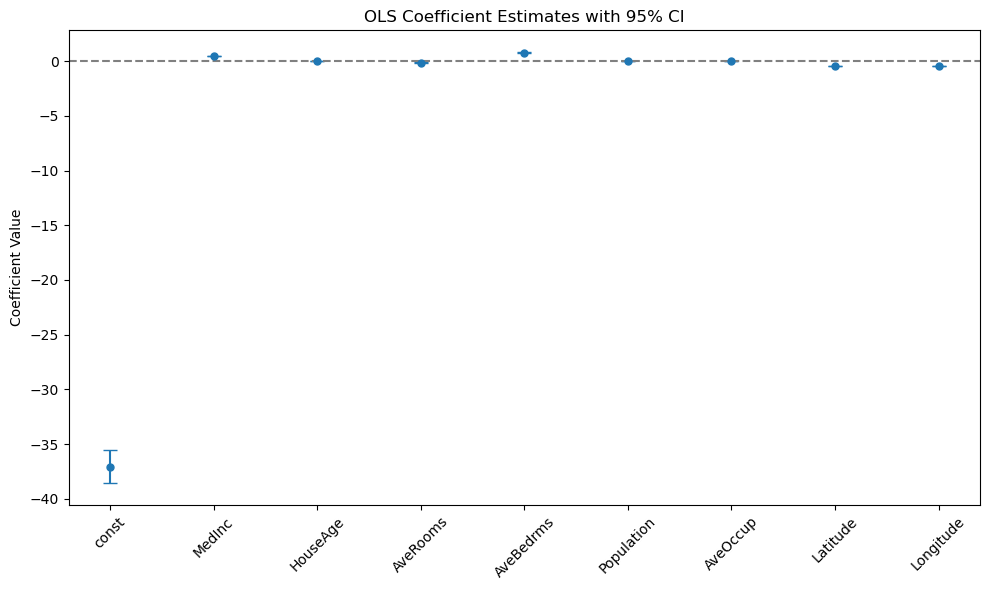

In [606]:
plt.figure(figsize=(10, 6))
plt.errorbar(df['feature'], df['coef'], 
             yerr=[df['coef'] - df['lower_ci'], df['upper_ci'] - df['coef']], 
             fmt='o', capsize=5, markersize=5)
plt.axhline(0, color='grey', linestyle='--')
plt.xticks(rotation=45)
plt.ylabel('Coefficient Value')
plt.title('OLS Coefficient Estimates with 95% CI')
plt.tight_layout()
plt.show()

**Absolute t-statistics bar plot**

*I want to visualize features by the strength of their value to establish how confidently I know each one matters.*

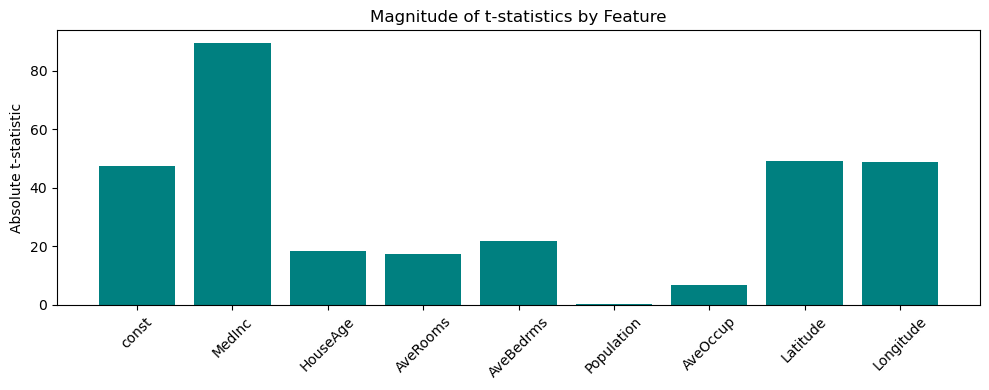

In [609]:
plt.figure(figsize=(10, 4))
plt.bar(df['feature'], df['t_stat'].abs(), color='teal')
plt.xticks(rotation=45)
plt.ylabel('Absolute t-statistic')
plt.title('Magnitude of t-statistics by Feature')
plt.tight_layout()
plt.show()

**Predict house values on the test set**

In [611]:
y_pred = model.predict(X_test_sm)

**Compute performance metrics**

In [613]:
r2  = r2_score(y_test, y_pred) 
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
aic = model.aic

print("\nPerformance Metrics:")
print(f"  R-squared: {r2:.4f}")
print(f"  MSE:       {mse:.4f}")
print(f"  MAE:       {mae:.4f}")
print(f"  AIC:       {aic:.2f}")


Performance Metrics:
  R-squared: 0.5958
  MSE:       0.5306
  MAE:       0.5272
  AIC:       31664.71


*These metrics tell me how well my baseline OLS model predicts new data. The AIC balances fit quality against the number of predictors*

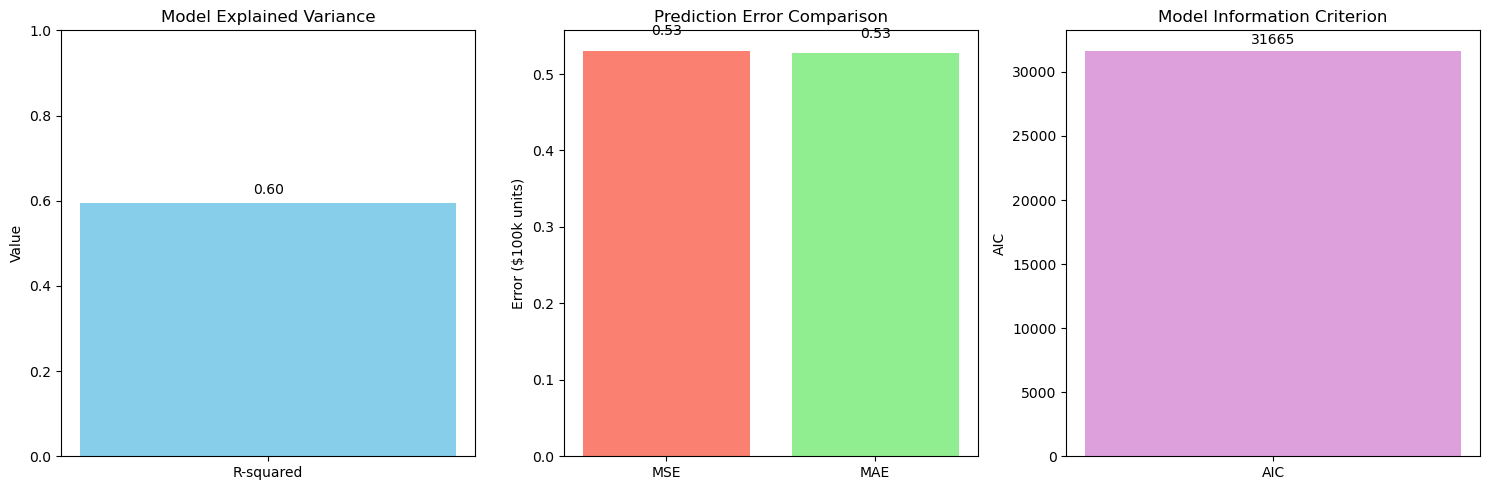

In [671]:
metrics = {
    'R-squared': 0.5958,
    'MSE': 0.5306,
    'MAE': 0.5272,
    'AIC': 31664.71}

fig, axes = plt.subplots(1, 3, figsize=(15, 5))


# R-squared plot
axes[0].bar(['R-squared'], [metrics['R-squared']], color='skyblue')
axes[0].set_ylim(0, 1)
axes[0].set_ylabel('Value')
axes[0].set_title('Model Explained Variance')
for idx, val in enumerate([metrics['R-squared']]):
    axes[0].text(idx, val + 0.02, f"{val:.2f}", ha='center')

# Error Metrics plot (MSE vs MAE)
axes[1].bar(['MSE', 'MAE'], [metrics['MSE'], metrics['MAE']], color=['salmon', 'lightgreen'])
axes[1].set_ylabel('Error ($100k units)')
axes[1].set_title('Prediction Error Comparison')
for idx, val in enumerate([metrics['MSE'], metrics['MAE']]):
    axes[1].text(idx, val + 0.02, f"{val:.2f}", ha='center')

# AIC plot
axes[2].bar(['AIC'], [metrics['AIC']], color='plum')
axes[2].set_ylabel('AIC')
axes[2].set_title('Model Information Criterion')
for idx, val in enumerate([metrics['AIC']]):
    axes[2].text(idx, val + 500, f"{val:.0f}", ha='center')

plt.tight_layout()
plt.show()

**Q–Q Plot of Residuals**

*Checks normality of the residuals -- a key OLS assumption. I want to see if residuals veer above or below the line. If so, then that means that some neighborhoods’ prices are consistently under- or over-estimated.*

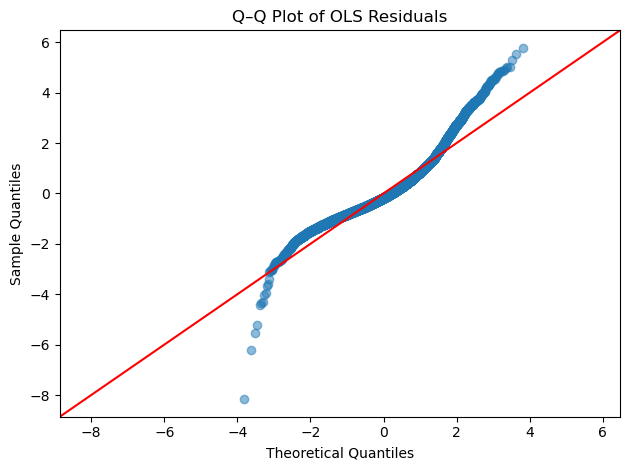

In [618]:
fig = sm.qqplot(model.resid, line="45", fit=True, alpha=0.5)
plt.title("Q–Q Plot of OLS Residuals")
plt.tight_layout()
plt.show()

**Influence Plot (Leverage vs. Standardized Residuals)**

*Identifies observations with high leverage or large residuals. This can be important for my hypothesis because if those influential outliers tend to be low-income blocks in wildfire corridors or valley bottoms, it’s evidence that hazard exposure produces unique price patterns not explained by basic features.*

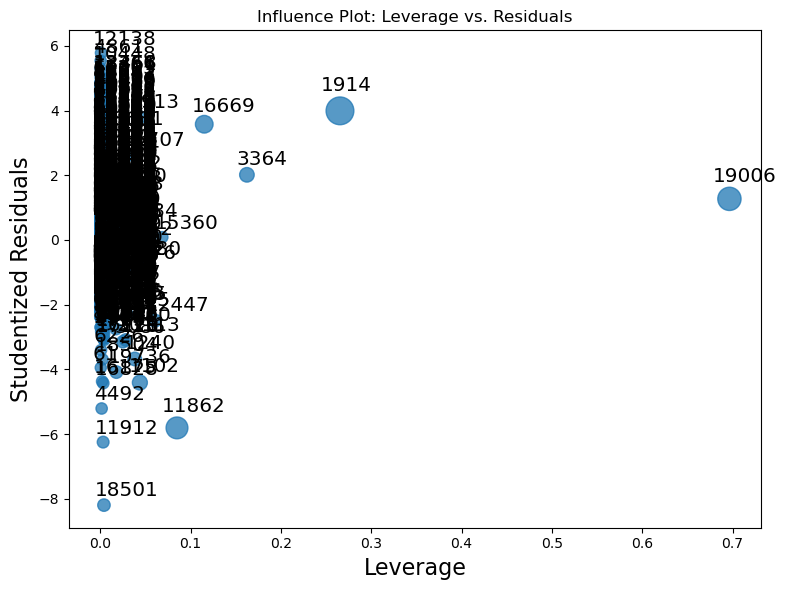

In [621]:
fig, ax = plt.subplots(figsize=(8,6))
sm.graphics.influence_plot(model, ax=ax, criterion="cooks", 
                           size=20, alpha=0.6)
plt.title("Influence Plot: Leverage vs. Residuals")
plt.tight_layout()
plt.show()

**Partial Regression Plots**

*Shows the relationship between each predictor and the target, controlling for all other features*

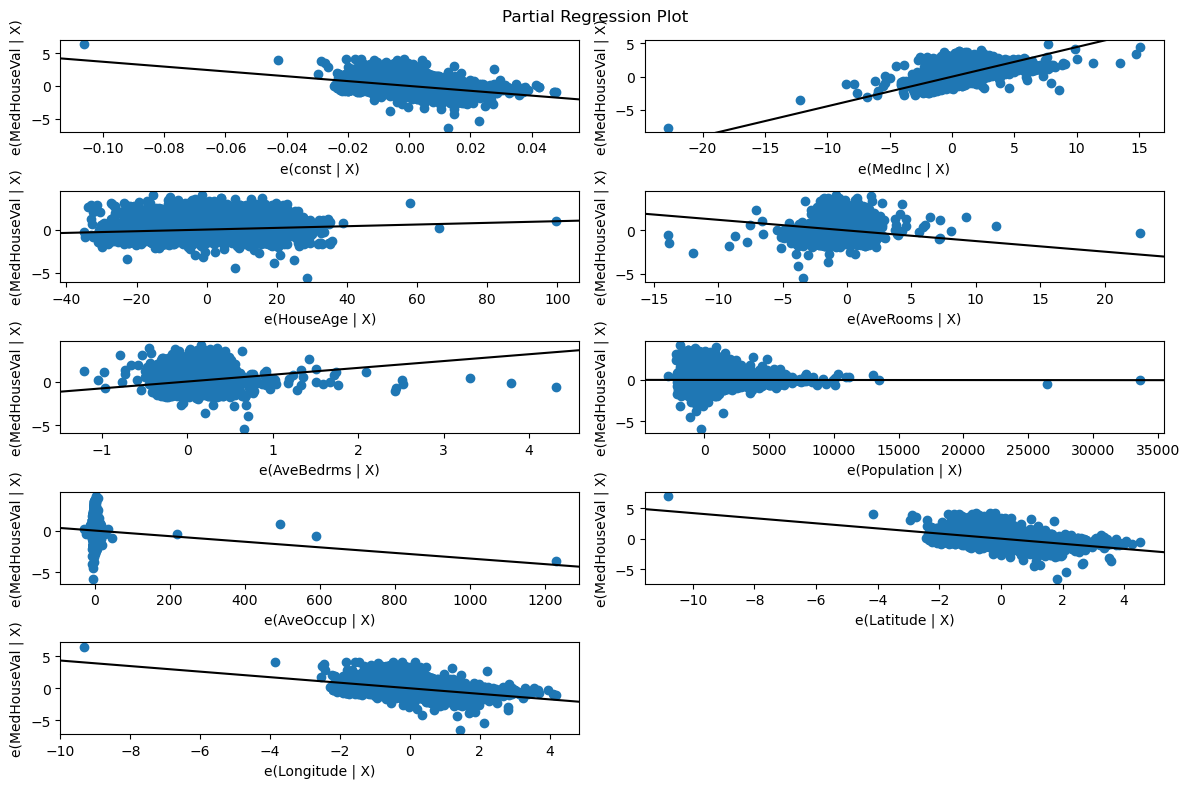

In [624]:
fig = smg.plot_partregress_grid(model, fig=plt.figure(figsize=(12, 8)))
fig.tight_layout()
plt.show()


**Component-Plus-Residual (CCPR) Plots**

*Plots the partial regression line plus the residuals for each predictor. These charts reveal whether a straight-line assumption is valid or if there’s a curve*

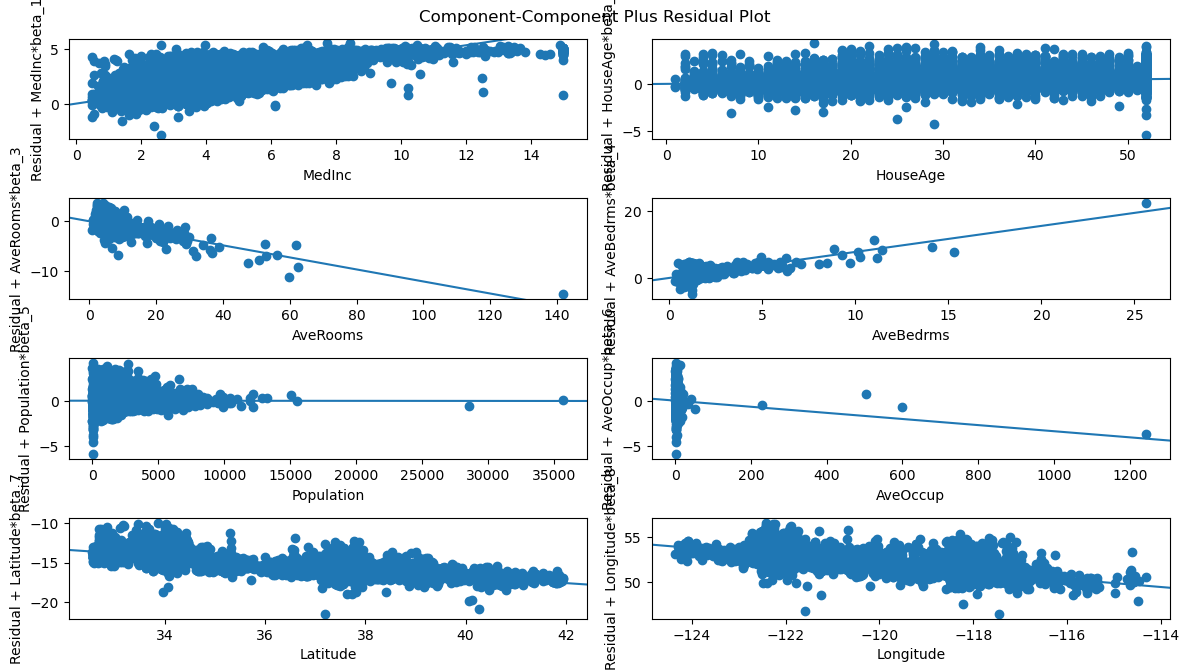

In [627]:
fig = sm.graphics.plot_ccpr_grid(model, fig=plt.figure(figsize=(12, 8)))
fig.tight_layout()
plt.show()

# **Performance Analysis and Recommendations**

The performance analysis of my model highlights how each metric plays a key role in providing evidence for my hypothesis. R² (0.5958) indicates that our baseline socioeconomic and geographic features explain just under 60% of the variability in median house values, leaving more than 40% of variance potentially attributable to environmental factors.

MSE (0.5306) and MAE (0.5272) show that our predictions reflect systematic under- or over-estimation in certain neighborhoods.

AIC (31664.71) provides a baseline measure balancing model fit against complexity.

One recommendation is to include environmental justice variables.

# **Conclusion**

My baseline OLS regression confirms that standard features leave significant unexplained variance, especially in at-risk, low-income communities. These findings justify the next step: integrating environmental-justice variables and interaction terms to quantify and validate the hypothesis that *Low-income California neighborhoods are systematically situated in environmental hazard zones, and this compounded disadvantage further suppresses their housing values beyond what is explained by conventional predictors.*